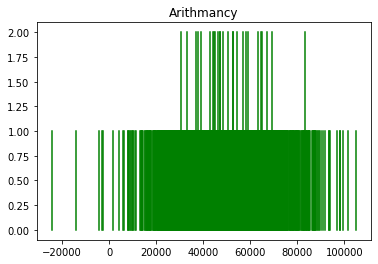

In [1]:
import matplotlib.pyplot as plt
import scipy.stats

def clean_empty_vals(dct):
    tmp_dct = {}
    for key in dct.keys():
        tmp_dct[key] = []
    for key, val_list in dct.items():
        for val_ind in range(len(val_list)):
            if val_list[val_ind] != '':
                tmp_dct[key].append(int(float(val_list[val_ind])))
    return tmp_dct

def get_data():
    with open("dataset_train.csv") as file:
        rows_list = file.read().splitlines()
        col_dict = {}
        labels = rows_list[0].split(',')
        for label in labels:
            col_dict[label] = []
        for row_ind in range(len(rows_list[1:])):
            values = rows_list[row_ind + 1].split(",")
            for index in range(len(col_dict)):
                col_dict[labels[index]].append(values[index])
    return col_dict

def del_labels(col_dict):
    labels = ["First Name", "Last Name", 'Birthday', "Best Hand", "Index", "Hogwarts House"]
    for label in labels:
        col_dict.pop(label)
    return col_dict

def count_values(col_dict):
    count_val_for_less = {}

    for col, lst_val in col_dict.items():
        count_val_for_less[col] = {}
        for val in lst_val:
            if val not in count_val_for_less[col]:
                count_val_for_less[col][val] = 1
            else:
                count_val_for_less[col][val] += 1
    return count_val_for_less

def choose_hepotise(dct, col):
    stat, p = scipy.stats.shapiro(dct[col]) # тест Шапиро-Уилк print(‘Statistics=%.3f, p-value=%.3f’ % (stat, p)
    alpha = 0.05
    if p > alpha:
        return 0
    return 1

col_dict = get_data()
col_dict = del_labels(col_dict)
col_dict = clean_empty_vals(col_dict)
count_val_for_less = count_values(col_dict)
labels = [keys for keys in col_dict.keys()]

for label in labels:
    keys =  list(count_val_for_less[label].keys())
    values =  list(count_val_for_less[label].values())
    ret_hep = choose_hepotise(col_dict, label)
    ind = 0
    while (ret_hep == 0 and ind < len(values)):
        plt.title(label)
        plt.plot([keys[ind] for x in range(values[ind] + 1)], [x for x in range(values[ind] + 1)], color="green")
        ind += 1
    plt.show()


# вывести название курса


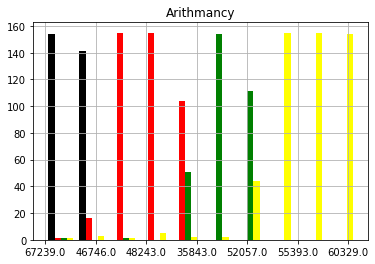

In [3]:
import matplotlib.pyplot as plt
import scipy.stats

def clean_empty_vals(dct):
    tmp_dct = {}
    dictind = {}
    for key in dct.keys():
        tmp_dct[key] = []
        dictind[key] = []
    for key, val_list in dct.items():
        for val_ind in range(len(val_list)):
            if val_list[val_ind] != '' and key != "Hogwarts House":
                tmp_dct[key].append(int(float(val_list[val_ind])))
                dictind[key].append(val_ind)
            elif key == "Hogwarts House":
                tmp_dct[key].append(val_list[val_ind])
    return tmp_dct, dictind

def get_data():
    with open("dataset_train.csv") as file:
        rows_list = file.read().splitlines()
        col_dict = {}
        labels = rows_list[0].split(',')
        for label in labels:
            col_dict[label] = []
        for row_ind in range(len(rows_list[1:])):
            values = rows_list[row_ind + 1].split(",")
            for index in range(len(col_dict)):
                col_dict[labels[index]].append(values[index])
    return col_dict

def del_labels(col_dict):
    labels = ["First Name", "Last Name", 'Birthday', "Best Hand", "Index"]
    for label in labels:
        col_dict.pop(label)
    return col_dict

def count_values(col_dict):
    count_val_for_less = {}

    for col, lst_val in col_dict.items():
        count_val_for_less[col] = {}
        for val in lst_val:
            if val not in count_val_for_less[col]:
                count_val_for_less[col][val] = 1
            else:
                count_val_for_less[col][val] += 1
    return count_val_for_less

def choose_hepotise(dct, col):
    stat, p = scipy.stats.shapiro(dct[col]) # тест Шапиро-Уилк print(‘Statistics=%.3f, p-value=%.3f’ % (stat, p)
    alpha = 0.05
    if p > alpha:
        return 0
    return 1

def get_data_for_label(dct, label, dictind):
    
    Slytherin, Ravenclaw,Gryffindor, Hufflepuff = [], [], [], []
    for val_ind in dictind[label]:
        if dct["Hogwarts House"][val_ind] == "Slytherin":
            Slytherin.append(dct[label][val_ind])
        elif dct["Hogwarts House"][val_ind] == "Ravenclaw":
            Ravenclaw.append(dct[label][val_ind])
        elif dct["Hogwarts House"][val_ind] == "Gryffindor":
            Gryffindor.append(dct[label][val_ind])
        elif dct["Hogwarts House"][val_ind] == "Hufflepuff":
            Hufflepuff.append(dct[label][val_ind])
    return Slytherin, Ravenclaw,Gryffindor, Hufflepuff

col_dict = get_data()
tmp_dict = col_dict
col_dict = del_labels(col_dict)
col_dict, dictind = clean_empty_vals(col_dict)
count_val_for_less = count_values(col_dict)
labels = [keys for keys in col_dict.keys()]
for label in labels:
    keys =  list(count_val_for_less[label].keys())
    if label != "Hogwarts House":
        ret_hep = choose_hepotise(col_dict, label)
        ind = 0
        if ret_hep == 0:
            Slytherin, Ravenclaw,Gryffindor, Hufflepuff = get_data_for_label(tmp_dict, label, dictind)
            myscale = 7 # значение для maxlocator. либо постоянное,
            ax = plt.axes()
            plt.title(label)
            ax.grid()
            ax.xaxis.set_major_locator(plt.MaxNLocator(myscale))
            plt.hist([Slytherin, Ravenclaw, Gryffindor, Hufflepuff], color=['Black', 'Red', 'Green', 'Yellow'], label=['Slytherin', 'Ravenclaw', 'Gryffindor', 'Hufflepuff'])
    plt.show()
